In [899]:
%load_ext autoreload
%autoreload 2

%load_ext line_profiler

#%% Change working directory from the workspace root to the ipynb file location. Turn this addition off with the DataSciece.changeDirOnImportExport setting
import os
try:
    os.chdir(r'C:\Users\kevin\Documents\Workspace\psylit-experiments')
    print("Changed cwd:", os.getcwd())
except:
    print("cwd:", os.getcwd())

from collections import *
from statistics import mean
from functools import *
from os import linesep as EOL
from itertools import *
import re

import spacy
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx
import plotly as py
py.offline.init_notebook_mode()
plt.rcParams['figure.figsize'] = 16,10
np.random.seed(0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
Changed cwd: C:\Users\kevin\Documents\Workspace\psylit-experiments


In [900]:
book = 'greatex_10k'
ents = pd.read_csv(r'outputs\{book}.edf.csv'.format(book=book))
data = pd.read_csv(r'outputs\{book}.df.csv'.format(book=book))

rel_cols = list(data.columns[list(data.columns.str.startswith('R_'))])
lex_cols = list(data.columns[list(data.columns.str.startswith('L_'))])

In [901]:
data

Unnamed: 0  L_NRCw_Em_anger  L_NRCw_Em_anticipation  L_NRCw_Em_disgust  \
0             0              0.0                     0.0                0.0   
1             1              0.0                     1.0                0.0   
2             2              0.0                     0.0                0.0   
3             3              0.0                     0.0                0.0   
4             4              0.0                     1.0                0.0   
5             5              0.0                     1.0                0.0   
6             6              0.0                     0.0                0.0   
7             7              0.0                     0.0                0.0   
8             8              0.0                     0.0                0.0   
9             9              0.0                     0.0                1.0   
10           10              0.0                     1.0                0.0   
11           11              0.0                     0.0                0.0   
12           12              0.0                     0.0                0.0   
13           13              0.0                     0.0                0.0   
14           14              0.0                     0.0                0.0   
15           15              0.0                     0.0                0.0   
16           16              0.0                     1.0                0.0   
17           17              0.0                     0.0                0.0   
18           18              0.0                     0.0                0.0   
19           19              0.0                     0.0                0.0   
20           20              0.0                     0.0                0.0   
21           21              1.0                     0.0                0.0   
22           22              0.0                     0.0                0.0   
23           23              0.0                     0.0                0.0   
24           24              0.0                     0.0                0.0   
25           25              0.0                     0.0                0.0   
26           26              0.0                     0.0                1.0   
27           27              0.0                     0.0                0.0   
28           28              0.0                     0.0                0.0   
29           29              0.0                     1.0                0.0   
..          ...              ...                     ...                ...   
83           83              0.0                     0.0                0.0   
84           84              0.0                     0.0                0.0   
85           85              0.0                     0.0                0.0   
86           86              0.0                     0.0                0.0   
87           87              0.0                     0.0                0.0   
88           88              1.0                     0.0                0.0   
89           89              1.0                     0.0                0.0   
90           90              0.0                     0.0                0.0   
91           91              0.0                     0.0                0.0   
92           92              0.0                     0.0                0.0   
93           93              0.0                     1.0                0.0   
94           94              1.0                     0.0                1.0   
95           95              0.0                     1.0                0.0   
96           96              0.0                     0.0                0.0   
97           97              0.0                     1.0                0.0   
98           98              0.0                     1.0                0.0   
99           99              0.0                     0.0                0.0   
100         100              0.0                     0.0                0.0   
101         101              0.0                     0.

In [906]:
ents

Unnamed: 0        categ  entity_i entity_pos  entity_root entity_tag  \
0             0      unknown       NaN        NaN      UNKNOWN        NaN   
1             1      unknown       NaN        NaN      UNKNOWN        NaN   
2             2      unknown       NaN        NaN      UNKNOWN        NaN   
3             3      unknown       NaN        NaN      UNKNOWN        NaN   
4             4      unknown       NaN        NaN      UNKNOWN        NaN   
5             5      unknown       NaN        NaN      UNKNOWN        NaN   
6             6      unknown       NaN        NaN      UNKNOWN        NaN   
7             7      unknown       NaN        NaN      UNKNOWN        NaN   
8             8      unknown       NaN        NaN      UNKNOWN        NaN   
9             9      unknown       NaN        NaN      UNKNOWN        NaN   
10           10      unknown       NaN        NaN      UNKNOWN        NaN   
11           11      unknown       NaN        NaN      UNKNOWN        NaN   
12           12      unknown       NaN        NaN      UNKNOWN        NaN   
13           13      unknown       NaN        NaN      UNKNOWN        NaN   
14           14      unknown       NaN        NaN      UNKNOWN        NaN   
15           15      unknown       NaN        NaN      UNKNOWN        NaN   
16           16      unknown       NaN        NaN      UNKNOWN        NaN   
17           17      unknown       NaN        NaN      UNKNOWN        NaN   
18           18      unknown       NaN        NaN      UNKNOWN        NaN   
19           19      unknown       NaN        NaN      UNKNOWN        NaN   
20           20      unknown       NaN        NaN      UNKNOWN        NaN   
21           21      unknown       NaN        NaN      UNKNOWN        NaN   
22           22      unknown       NaN        NaN      UNKNOWN        NaN   
23           23  environment       NaN        NaN  ENVIRONMENT        NaN   
24           24      unknown       NaN        NaN      UNKNOWN        NaN   
25           25      unknown       NaN        NaN      UNKNOWN        NaN   
26           26  environment       NaN        NaN  ENVIRONMENT        NaN   
27           27      unknown       NaN        NaN      UNKNOWN        NaN   
28           28      unknown       NaN        NaN      UNKNOWN        NaN   
29           29      unknown       NaN        NaN      UNKNOWN        NaN   
..          ...          ...       ...        ...          ...        ...   
477         477       person      25.0       NOUN          boy         NN   
478         478       person      25.0       NOUN          boy         NN   
479         479       person      25.0       NOUN          boy         NN   
480         480       person      25.0       NOUN          boy         NN   
481         481       person      25.0       NOUN          boy         NN   
482         482       reader      26.0       PRON          you        PRP   
483         483       reader      26.0       PRON          you        PRP   
484         484       reader      27.0       PRON          you        PRP   
485         485       reader      27.0       PRON          you        PRP   
486         486  environment      28.0       NOUN  church wall         NN   
487         487  environment      28.0       NOUN  church wall         NN   
488         488  environment      28.0       NOUN  church wall         NN   
489         489  environment      29.0       NOUN       people        NNS   
490         490  environment      29.0       NOUN       people        NNS   
491         491  environment      30.0       NOUN      marshes        NNS   
492         492  environment      30.0       NOUN      marshes        NNS   
493         493  environment      31.0       PRON           it        PRP   
494         494  environment      31.0       PRON           it        PRP   
495         495       person      32.0       NOUN       pirate         NN   
496         496       person      32.0       NOUN       pirate         NN   
4

In [907]:
ent_counts = pd.concat([data[r] for r in rel_cols], axis='rows').dropna().value_counts()
most_common = ent_counts.idxmax() # most common
print('most_common =', most_common)
ent_counts

most_common = man


man            59
my             18
sir            14
boy            12
you             8
father          2
marshes         2
sister          2
piece           2
cattle          1
people          1
arms            1
church          1
their           1
church wall     1
terms           1
river           1
dtype: int64

In [908]:
ents[ents.categ == 'narrator']

Unnamed: 0     categ  entity_i entity_pos entity_root entity_tag  \
90           90  narrator       NaN        NaN    NARRATOR        NaN   
96           96  narrator       NaN        NaN    NARRATOR        NaN   
196         196  narrator       0.0        DET          my       PRP$   
197         197  narrator       0.0        DET          my       PRP$   
198         198  narrator       0.0        DET          my       PRP$   
199         199  narrator       0.0        DET          my       PRP$   
200         200  narrator       0.0        DET          my       PRP$   
201         201  narrator       0.0        DET          my       PRP$   
202         202  narrator       0.0        DET          my       PRP$   
203         203  narrator       0.0        DET          my       PRP$   
204         204  narrator       0.0        DET          my       PRP$   
205         205  narrator       0.0        DET          my       PRP$   
206         206  narrator       0.0        DET          my       PRP$   
207         207  narrator       0.0        DET          my       PRP$   
208         208  narrator       0.0        DET          my       PRP$   
209         209  narrator       0.0        DET          my       PRP$   
210         210  narrator       0.0        DET          my       PRP$   
211         211  narrator       0.0        DET          my       PRP$   
212         212  narrator       0.0        DET          my       PRP$   
213         213  narrator       0.0        DET          my       PRP$   
214         214  narrator       0.0        DET          my       PRP$   
215         215  narrator       0.0        DET          my       PRP$   
216         216  narrator       0.0        DET          my       PRP$   

    entity_text     i mention_pos mention_root mention_tag mention_text    t0  \
90          NaN  1034        PRON            i         PRP            I  1028   
96          NaN  1167        PRON         mine         PRP         mine  1119   
196          My     2         DET           my        PRP$           My     0   
197          My    10         DET           my        PRP$           my     0   
198          My    15         DET           my        PRP$           my     0   
199          My    33        PRON            i         PRP            I    31   
200          My    35        PRON       myself         PRP       myself    31   
201          My    46        PRON            i         PRP            I    46   
202          My    50         DET           my        PRP$           my    46   
203          My    62         DET           my        PRP$           my    46   
204          My    75        PRON            i         PRP            I    74   
205          My    78         DET           my        PRP$           my    74   
206          My    81         DET           my        PRP$           my    74   
207          My   105         DET           my        PRP$           my    74   
208          My   126         DET           my        PRP$           my   120   
209          My   131        PRON           me         PRP           me   120   
210          My   168        PRON            i         PRP            I   151   
211          My   174         DET           my        PRP$           my   151   
212          My   234        PRON            i         PRP            I   181   
213          My   240        PRON            i         PRP            I   181   
214          My   294         DET           my        PRP$           My   294   
215          My   308        PRON           me         PRP           me   294   
216          My   320        PRON            i         PRP            I   316   

       t1  
90   1036  
96   1176  
196    31  
197    31  
198    31  
199    46  
200    46  
201    67  
202    67  
203    67  
204   120  
205   120  
206   120  
207   120  
208   151  
209   151  
210   181  
211   181  
212   272  
213   272  
214   316  
215   316  
216   457

In [909]:
def make_entity_lookup(ents, subject=None):
    ents_lookup = ents[['t0','entity_root', 'categ']].drop_duplicates()
    #ents_lookup.rename(index=str, columns={'entity_root': 'root', 'entity_name': 'name'}, inplace=True)
    #ents_lookup.set_index('entity_root', inplace=True, verify_integrity=True)
    
    is_narrator = ents_lookup.categ == 'narrator'
    is_reader = ents_lookup.categ == 'reader'

    if subject:
        is_subject = ents_lookup.entity_root == subject
    else:
        is_subject = is_narrator
        
    #ents_lookup.loc[narrator,'entity_root'] = 'NARRATOR'
    #ents_lookup.loc[reader,'entity_root'] = 'READER'

    ents_lookup.loc[is_narrator,'categ'] = 'person'
    ents_lookup.loc[is_reader,'categ'] = 'person'
    
    ents_lookup.loc[is_subject, 'categ'] = 'subject'
    
    most_likely_categ = lambda fr: fr.categ.value_counts(normalize=True, ascending=False, dropna=False).idxmax()
    ents_lookup = ents_lookup.groupby('entity_root').apply(most_likely_categ)
    ents_lookup.name = 'ent_class'
    #ents_lookup.at['NARRATOR']
    return ents_lookup

subject = most_common
ents_lookup = make_entity_lookup(ents, subject=subject)
print(ents_lookup[ents_lookup == 'subject'])
ents_lookup[ents_lookup == 'person']

entity_root
man    subject
Name: ent_class, dtype: object


entity_root
NARRATOR    person
PERSON      person
READER      person
boy         person
father      person
head        person
herself     person
mother      person
my          person
name        person
pip         person
pirate      person
pirrip      person
sir         person
sister      person
us          person
you         person
Name: ent_class, dtype: object

In [916]:
ents_lookup[ents.entity_root].value_counts(dropna=False)

person         175
unknown        160
subject        113
environment     59
Name: ent_class, dtype: int64

In [917]:
def set_entity_class(data, ents_lookup):
    merged = data
    for col in rel_cols:
        rel = col[2:]
        #print(f'merge on left:{col} ({rel}), right: {ents_lookup.index.name}')
        merged = merged.merge(ents_lookup, how='left', left_on=col, right_index=True, suffixes=('',f'__{rel}'))

    # fix first merge not applying suffix:
    merged.rename(index=str, columns={ents_lookup.name: f'{ents_lookup.name}__{rel_cols[0][2:]}'}, inplace=True)

    return merged

merged = set_entity_class(data, ents_lookup)
merged

Unnamed: 0  L_NRCw_Em_anger  L_NRCw_Em_anticipation  L_NRCw_Em_disgust  \
0             0              0.0                     0.0                0.0   
1             1              0.0                     1.0                0.0   
2             2              0.0                     0.0                0.0   
3             3              0.0                     0.0                0.0   
4             4              0.0                     1.0                0.0   
5             5              0.0                     1.0                0.0   
6             6              0.0                     0.0                0.0   
7             7              0.0                     0.0                0.0   
8             8              0.0                     0.0                0.0   
9             9              0.0                     0.0                1.0   
10           10              0.0                     1.0                0.0   
11           11              0.0                     0.0                0.0   
12           12              0.0                     0.0                0.0   
13           13              0.0                     0.0                0.0   
14           14              0.0                     0.0                0.0   
15           15              0.0                     0.0                0.0   
16           16              0.0                     1.0                0.0   
17           17              0.0                     0.0                0.0   
18           18              0.0                     0.0                0.0   
19           19              0.0                     0.0                0.0   
20           20              0.0                     0.0                0.0   
21           21              1.0                     0.0                0.0   
22           22              0.0                     0.0                0.0   
23           23              0.0                     0.0                0.0   
24           24              0.0                     0.0                0.0   
25           25              0.0                     0.0                0.0   
26           26              0.0                     0.0                1.0   
27           27              0.0                     0.0                0.0   
28           28              0.0                     0.0                0.0   
29           29              0.0                     1.0                0.0   
..          ...              ...                     ...                ...   
83           83              0.0                     0.0                0.0   
84           84              0.0                     0.0                0.0   
85           85              0.0                     0.0                0.0   
86           86              0.0                     0.0                0.0   
87           87              0.0                     0.0                0.0   
88           88              1.0                     0.0                0.0   
89           89              1.0                     0.0                0.0   
90           90              0.0                     0.0                0.0   
91           91              0.0                     0.0                0.0   
92           92              0.0                     0.0                0.0   
93           93              0.0                     1.0                0.0   
94           94              1.0                     0.0                1.0   
95           95              0.0                     1.0                0.0   
96           96              0.0                     0.0                0.0   
97           97              0.0                     1.0                0.0   
98           98              0.0                     1.0                0.0   
99           99              0.0                     0.0                0.0   
100         100              0.0                     0.0                0.0   
101         101              0.0                     0.

In [918]:
#has_subject = merged[rel_cols].apply(lambda col: col == 'subject', axis='columns').any(axis='columns')
#merged[has_subject]
merged[(merged.ent_class__agent == 'subject') |
       (merged.ent_class__patient == 'subject')
       #(merged.ent_class__possessive == 'subject') |
       #(merged.ent_class__predicative == 'subject')
      ]#.lemma#.value_counts(ascending=False) 

Unnamed: 0  L_NRCw_Em_anger  L_NRCw_Em_anticipation  L_NRCw_Em_disgust  \
21          21              1.0                     0.0                0.0   
22          22              0.0                     0.0                0.0   
23          23              0.0                     0.0                0.0   
24          24              0.0                     0.0                0.0   
25          25              0.0                     0.0                0.0   
26          26              0.0                     0.0                1.0   
27          27              0.0                     0.0                0.0   
28          28              0.0                     0.0                0.0   
29          29              0.0                     1.0                0.0   
30          30              0.0                     0.0                0.0   
32          32              0.0                     0.0                0.0   
55          55              0.0                     1.0                0.0   
56          56              0.0                     0.0                0.0   
57          57              0.0                     0.0                0.0   
58          58              0.0                     1.0                0.0   
59          59              1.0                     0.0                0.0   
60          60              0.0                     1.0                0.0   
61          61              0.0                     0.0                0.0   
62          62              0.0                     1.0                0.0   
63          63              0.0                     1.0                0.0   
64          64              0.0                     0.0                0.0   
65          65              0.0                     0.0                0.0   
66          66              0.0                     0.0                0.0   
67          67              0.0                     0.0                0.0   
68          68              0.0                     1.0                0.0   
69          69              0.0                     1.0                0.0   
70          70              0.0                     1.0                0.0   
71          71              0.0                     0.0                0.0   
72          72              0.0                     1.0                0.0   
73          73              0.0                     0.0                0.0   
74          74              0.0                     0.0                0.0   
75          75              0.0                     0.0                0.0   
76          76              1.0                     0.0                1.0   
77          77              0.0                     0.0                0.0   
78          78              0.0                     0.0                0.0   
79          79              0.0                     0.0                0.0   
80          80              0.0                     1.0                0.0   
81          81              0.0                     1.0                0.0   
82          82              0.0                     0.0                0.0   
83          83              0.0                     0.0                0.0   
84          84              0.0                     0.0                0.0   
85          85              0.0                     0.0                0.0   
86          86              0.0                     0.0                0.0   
87          87              0.0                     0.0                0.0   
88          88              1.0                     0.0                0.0   
89          89              1.0                     0.0                0.0   
90          90              0.0                     0.0                0.0   
91          91              0.0                     0.0                0.0   
92          92              0.0                     0.0                0.0   
93          93              0.0                     1.0                0.0   
94          94            

In [919]:
def cascade_representation(data, dummies_cols, token_cols, casc_index=['t']):
    dum_cascades = pd.get_dummies(data[dummies_cols], dummy_na=False, prefix_sep='+')
    dum_cascades.rename(mapper=lambda c: '_'.join(c.split('__')[1].split('+')), axis='columns', inplace=True)
    dum_casc_cols = list(dum_cascades.columns)
    
    tok_cascades = (data[token_cols] > data[token_cols].mean()) * 1
    casc = pd.concat([data[casc_index], dum_cascades, tok_cascades], axis='columns')
    casc = casc.groupby(casc_index).any()*1
    return casc


ent_cols = list(merged.columns[list(merged.columns.str.contains('__'))])
keep = (~merged[ent_cols].isna()).any(axis='columns') & ~merged.neg
casc = cascade_representation(
    merged[keep][['t','neg']+ent_cols+rel_cols+lex_cols],
    dummies_cols=ent_cols,
    token_cols=lex_cols)
casc

agent_environment  agent_person  agent_subject  agent_unknown  \
t                                                                     
0                     0             1              0              0   
46                    0             1              0              0   
74                    0             1              0              0   
120                   0             1              0              0   
151                   0             1              0              0   
181                   0             1              0              1   
294                   0             1              0              0   
316                   0             1              0              0   
517                   0             0              1              0   
538                   0             0              1              0   
603                   0             0              1              0   
759                   1             0              1              0   
820                   0             0              1              0   
901                   0             0              1              0   
960                   0             1              0              0   
985                   0             0              1              0   
1005                  0             1              0              0   
1016                  0             1              0              0   
1051                  0             1              0              0   
1080                  0             1              0              0   
1177                  0             1              0              0   
1363                  1             0              0              0   
1383                  1             1              0              0   
1411                  0             1              0              0   
1427                  0             1              0              0   
1482                  0             1              0              0   
1531                  0             1              1              0   
1551                  0             0              1              0   
1560                  0             0              1              0   
1587                  0             1              1              0   
1604                  0             1              1              0   
1654                  0             1              1              0   
1674                  0             0              1              0   
1698                  0             1              0              0   
1761                  0             1              1              0   
1834                  0             0              1              0   
1866                  1             1              1              0   
1958                  0             0              1              0   
1980                  0             0              1              0   
2039                  1             0              1              0   
2094                  0             0              1              0   
2168                  0             0              1              0   
2199                  1             0              1              0   
2232                  0             0              1              0   
2266                  0             0              1              0   
2298                  0             0              1              0   

      patient_environment  patient_person  patient_subject  L_NRCw_Em_anger  \
t                                                                             
0                       0               0                0                0   
46                      0               0                0                0   
74                      0               0                0                0   
120                     0               0                0                0   
151                     0               0                0                0   
181                     0               0   

In [920]:
casc[casc.agent_subject > 0].mean()

agent_environment         0.153846
agent_person              0.230769
agent_subject             1.000000
agent_unknown             0.000000
patient_environment       0.076923
patient_person            0.115385
patient_subject           0.192308
L_NRCw_Em_anger           0.230769
L_NRCw_Em_anticipation    0.615385
L_NRCw_Em_disgust         0.115385
L_NRCw_Em_fear            0.307692
L_NRCw_Em_joy             0.576923
L_NRCw_Em_negative        0.615385
L_NRCw_Em_positive        0.692308
L_NRCw_Em_sadness         0.230769
L_NRCw_Em_surprise        0.461538
L_NRCw_Em_trust           0.423077
dtype: float64

In [925]:
import plotly as py
import plotly.graph_objs as go

def get_traces(casc):
    for ecol in ent_casc_cols:
        if ecol not in casc.columns:
            continue
        mask = casc[lex_cols][casc[ecol] == 1] == 1
        mask_idx = mask.index[mask[c]]
        trace_data = [(c, mask_idx) for c in lex_cols]
        #trace_data = np.array([[v.to_numpy(), [k]*len(v)] for k, v in trace_data.items()])
        #print(trace_data.shape)
        #return trace_data
        x = np.concatenate([idx.to_numpy() for c, idx in trace_data])
        y = np.concatenate([[c]*len(idx)   for c, idx in trace_data])
        yield go.Scattergl({
            "x": x,
            "y": y, 
            "marker": {"opacity": 0.75}, 
            "hoverinfo": "text",
            #"text": txt,
            "mode": "markers", 
            "name": ecol, 
            "type": "scatter"
        })
        
traces = list(get_traces(casc))
layout = {"title": "", 
          "xaxis": {"title": "", }, 
          "yaxis": {"title": ""}}

fig = go.Figure(data=traces)
py.offline.iplot(fig)

In [926]:
casc.loc[casc['agent_person'] == 1, lc]

NameError: name 'lc' is not defined

In [927]:
from scipy.stats import ttest_ind
    
ttest_ind(
    casc.loc[casc['patient_subject'] == 1, lex_cols],
    casc[lex_cols].mean(),
    #casc.loc[casc['agent_person'] == 1, lex_cols],
)

Ttest_indResult(statistic=array([ 0.06942316,  0.06942316, -1.15790841,  0.06942316,  1.13391158,
        7.0284073 ,  2.55816975,  0.06942316, -1.15790841,  0.06942316]), pvalue=array([9.45709321e-01, 9.45709321e-01, 2.67732631e-01, 9.45709321e-01,
       2.77309434e-01, 8.95373747e-06, 2.38214686e-02, 9.45709321e-01,
       2.67732631e-01, 9.45709321e-01]))

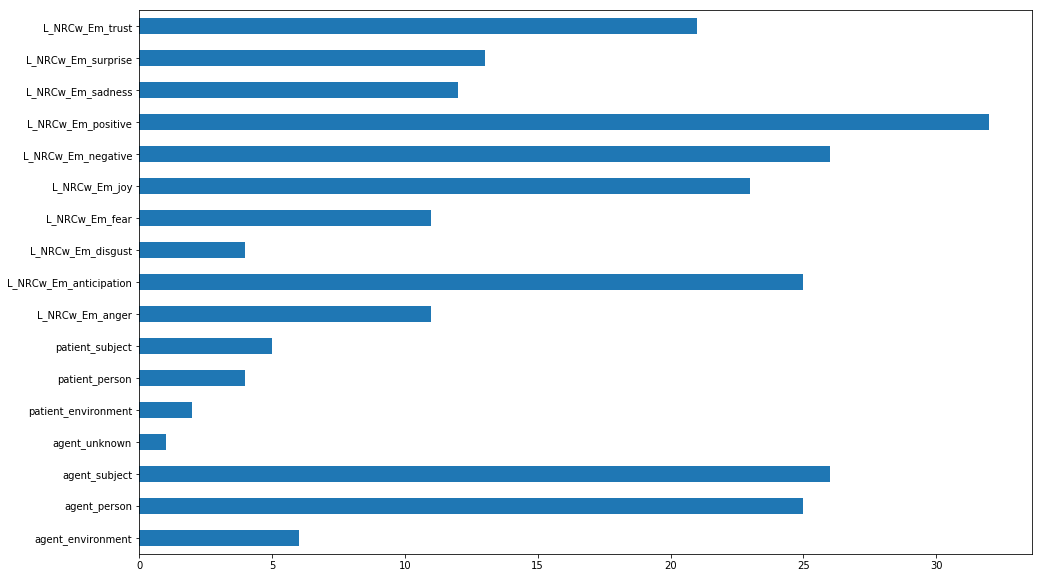

In [928]:
casc.sum().plot(kind='barh')

In [929]:
casc.loc[casc['patient_subject'] == 1, lex_cols].mean()

L_NRCw_Em_anger           0.4
L_NRCw_Em_anticipation    0.4
L_NRCw_Em_disgust         0.2
L_NRCw_Em_fear            0.4
L_NRCw_Em_joy             0.6
L_NRCw_Em_negative        1.0
L_NRCw_Em_positive        0.8
L_NRCw_Em_sadness         0.4
L_NRCw_Em_surprise        0.2
L_NRCw_Em_trust           0.4
dtype: float64

In [930]:
def pair_cascades(casc, sources, destinations, sep=' & '):
    pairs = product(sources, destinations)
    return pd.DataFrame({
        f"{s}{sep}{d}": casc[s] * casc[d]
        for s, d in pairs})

col_startswith = lambda df, pattern: list(df.columns[df.columns.str.startswith(pattern)])
higher_casc = pair_cascades(casc,
                            col_startswith(casc, ('agent','patient')),
                            col_startswith(casc, 'L_'))
higher_casc

agent_environment & L_NRCw_Em_anger  \
t                                           
0                                       0   
46                                      0   
74                                      0   
120                                     0   
151                                     0   
181                                     0   
294                                     0   
316                                     0   
517                                     0   
538                                     0   
603                                     0   
759                                     0   
820                                     0   
901                                     0   
960                                     0   
985                                     0   
1005                                    0   
1016                                    0   
1051                                    0   
1080                                    0   
1177                                    0   
1363                                    0   
1383                                    1   
1411                                    0   
1427                                    0   
1482                                    0   
1531                                    0   
1551                                    0   
1560                                    0   
1587                                    0   
1604                                    0   
1654                                    0   
1674                                    0   
1698                                    0   
1761                                    0   
1834                                    0   
1866                                    1   
1958                                    0   
1980                                    0   
2039                                    0   
2094                                    0   
2168                                    0   
2199                                    0   
2232                                    0   
2266                                    0   
2298                                    0   

      agent_environment & L_NRCw_Em_anticipation  \
t                                                  
0                                              0   
46                                             0   
74                                             0   
120                                            0   
151                                            0   
181                                            0   
294                                            0   
316                                            0   
517                                            0   
538                                            0   
603                                            0   
759                                            0   
820                                            0   
901                                            0   
960                                            0   
985                                            0   
1005                                           0   
1016                                           0   
1051                                           0   
1080                                           0   
1177                                           0   
1363                                           0   
1383                                           1   
1411                                           0   
1427                                           0   
1482                                           0   
1531                                           0   
1551                                           0   
1560                                           0   
1587                                           0   
1604                                           0   
1654                                           0   
1674                                           0   
1698                     

In [931]:
#higher_casc.sum().plot(kind='barh')
higher_casc = higher_casc.loc[:, higher_casc.sum() > 50]
higher_casc.sum().plot(kind='barh')

TypeError: Empty 'DataFrame': no numeric data to plot

In [932]:
from pyinform import transferentropy as te

def transfer_entropies(casc, source_cols, destination_cols, **kwargs):
    #n, m = len(source_cols), len(destination_cols)
    #mat = np.ones([n,m]) * np.nan
    #cols = product(enumerate(source_cols), enumerate(destination_cols))
    rows = []
    for i, sc in enumerate(source_cols):
        rows.append({'source': sc, 
                     **{dc:te.transfer_entropy(casc[sc], casc[dc], **kwargs) for dc in destination_cols }})
    df = pd.DataFrame(rows)
    df.set_index('source', inplace=True, verify_integrity=True)
    return df

#src_cols = (list(casc.columns[casc.columns.str.startswith('L_')]) +
#            list(casc.columns[casc.columns.str.startswith('agent_')]))
#dst_cols = list(casc.columns[casc.columns.str.startswith('patient_')])
all_cols = list(higher_casc.columns)
k = 10
T = transfer_entropies(higher_casc, all_cols, all_cols, k=k)
T

KeyError: 'source'

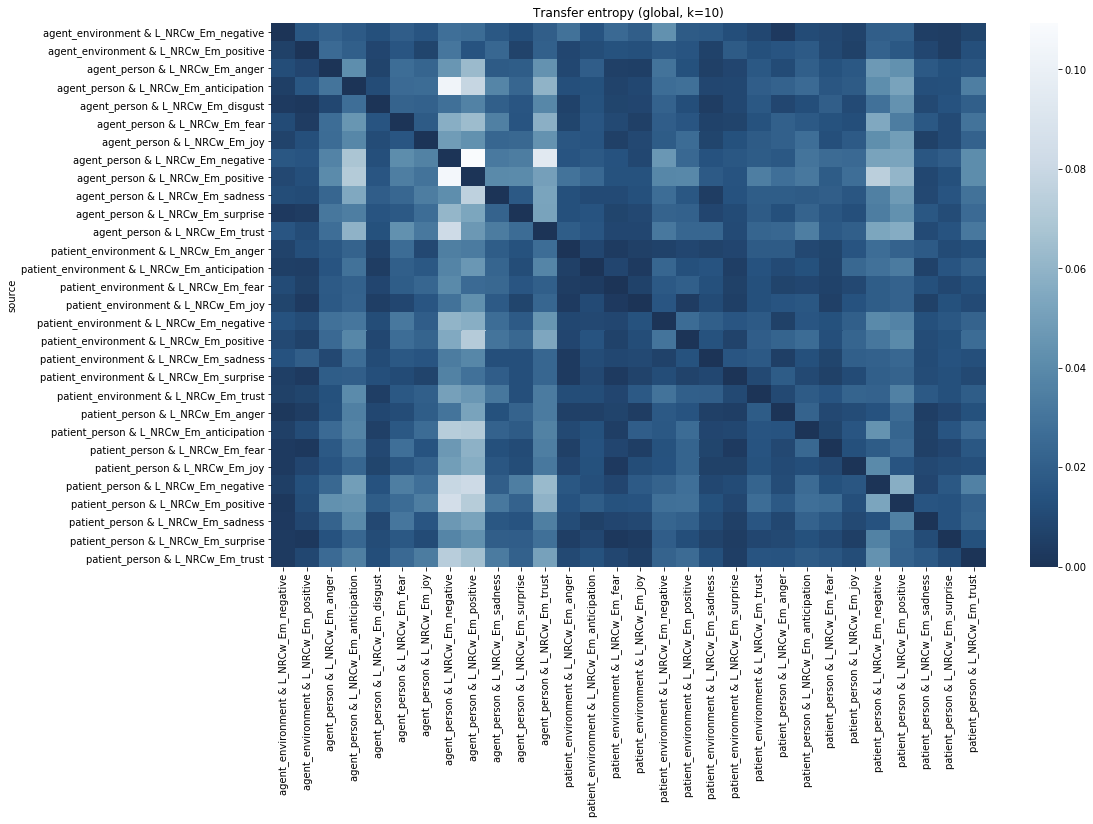

In [621]:
import plotly.figure_factory as ff
#x = te_1.index
#y = te_1.destination

#fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text)#, colorscale='Viridis')
sns.heatmap(T, annot=False, cmap=seq_cmap)
plt.title(f"Transfer entropy (global, k={k})")
plt.show()

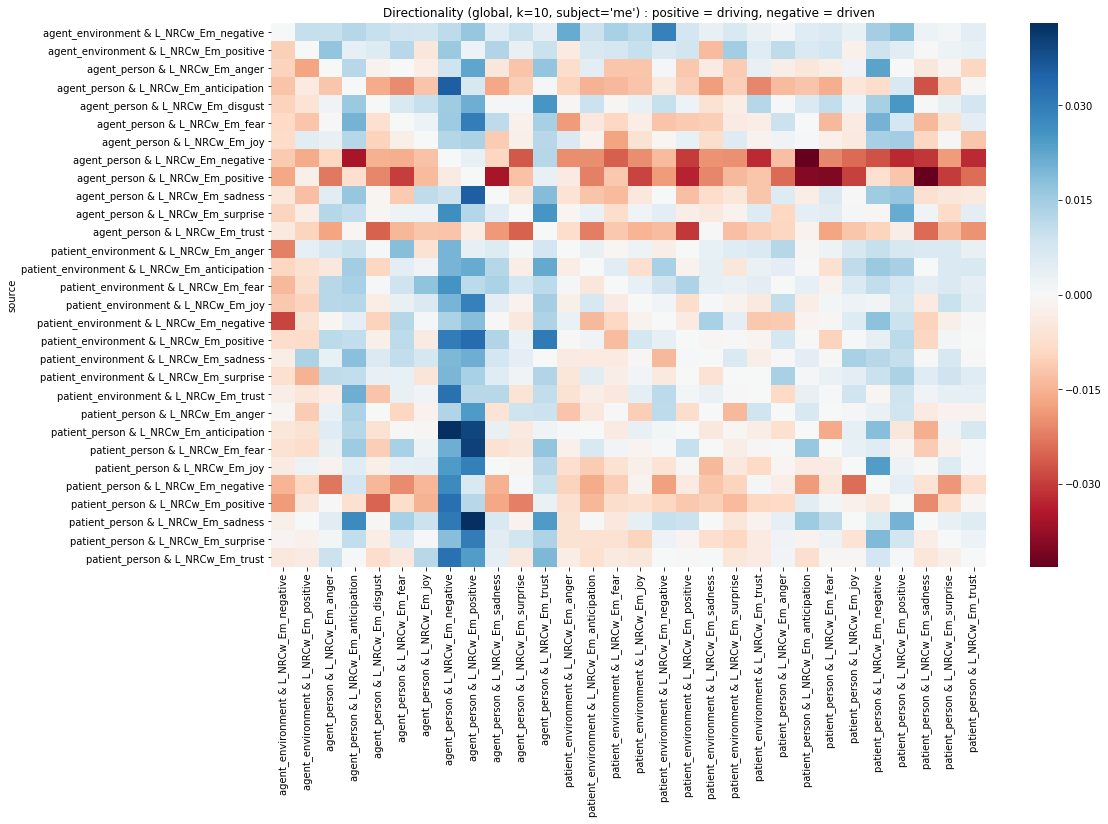

In [622]:
sns.heatmap((T - T.T), annot=False, cmap='RdBu')#, fmt="d")
plt.title(f"Directionality (global, k={k}, subject={subject!r}) : positive = driving, negative = driven")
plt.show()

In [623]:
from pyinform import blockentropy as be
def get_block_entropies(casc, cols, kmax=10):
    n = len(casc.index)
    
    data = []
    for k in range(1, kmax):
        for c in cols:
            benk = be.block_entropy(casc[c], k=k)
            data.append({'k': k, 'cascade': c, 'block_entropy_k': benk})
    
    return pd.DataFrame(data)

block_entrs = get_block_entropies(higher_casc, all_cols, kmax=30)

In [624]:
from pyinform import activeinfo as ai

def get_local_ais(casc, cols, k=10):
    n = len(casc.index)
    m = len(cols)
    t = np.tile(np.arange(n), m)
    
    lbl = np.repeat(np.array(cols), n)
    a = []
    pad_w = k-1
    a_c = np.ones([n]) * np.nan
    for c in cols:
        a_c[:-k] = ai.active_info(casc[c], k=k, local=True).squeeze()
        a.append(a_c)
    a = np.concatenate(a)
    
    df = pd.DataFrame({'ais': a, 'cascade': lbl, 't':t})
    df[['e','f']] = df.cascade.str.split(' & ',expand=True)
    return df

ais = get_local_ais(higher_casc, all_cols, k=11)
ais

ais                                 cascade    t  \
0      0.017811  agent_environment & L_NRCw_Em_negative    0   
1     -0.102483  agent_environment & L_NRCw_Em_negative    1   
2      0.219445  agent_environment & L_NRCw_Em_negative    2   
3     -0.002947  agent_environment & L_NRCw_Em_negative    3   
4      0.026800  agent_environment & L_NRCw_Em_negative    4   
5     -0.002947  agent_environment & L_NRCw_Em_negative    5   
6     -0.002947  agent_environment & L_NRCw_Em_negative    6   
7      0.033032  agent_environment & L_NRCw_Em_negative    7   
8     -0.090895  agent_environment & L_NRCw_Em_negative    8   
9      0.072604  agent_environment & L_NRCw_Em_negative    9   
10     0.081942  agent_environment & L_NRCw_Em_negative   10   
11    -0.219228  agent_environment & L_NRCw_Em_negative   11   
12    -0.017594  agent_environment & L_NRCw_Em_negative   12   
13     0.123230  agent_environment & L_NRCw_Em_negative   13   
14     0.081942  agent_environment & L_NRCw_Em_negative   14   
15    -1.219228  agent_environment & L_NRCw_Em_negative   15   
16     0.219445  agent_environment & L_NRCw_Em_negative   16   
17     1.240204  agent_environment & L_NRCw_Em_negative   17   
18     0.219445  agent_environment & L_NRCw_Em_negative   18   
19     0.219445  agent_environment & L_NRCw_Em_negative   19   
20     2.825166  agent_environment & L_NRCw_Em_negative   20   
21     0.219445  agent_environment & L_NRCw_Em_negative   21   
22     0.219445  agent_environment & L_NRCw_Em_negative   22   
23     1.825166  agent_environment & L_NRCw_Em_negative   23   
24     0.219445  agent_environment & L_NRCw_Em_negative   24   
25     2.825166  agent_environment & L_NRCw_Em_negative   25   
26     0.219445  agent_environment & L_NRCw_Em_negative   26   
27     2.825166  agent_environment & L_NRCw_Em_negative   27   
28     0.219445  agent_environment & L_NRCw_Em_negative   28   
29     0.219445  agent_environment & L_NRCw_Em_negative   29   
...         ...                                     ...  ...   
29640  0.219445        patient_person & L_NRCw_Em_trust  959   
29641  0.219445        patient_person & L_NRCw_Em_trust  960   
29642  0.219445        patient_person & L_NRCw_Em_trust  961   
29643  0.219445        patient_person & L_NRCw_Em_trust  962   
29644  0.219445        patient_person & L_NRCw_Em_trust  963   
29645  0.219445        patient_person & L_NRCw_Em_trust  964   
29646  0.219445        patient_person & L_NRCw_Em_trust  965   
29647  0.825166        patient_person & L_NRCw_Em_trust  966   
29648 -0.195592        patient_person & L_NRCw_Em_trust  967   
29649  0.123230        patient_person & L_NRCw_Em_trust  968   
29650  0.081942        patient_person & L_NRCw_Em_trust  969   
29651  0.129247        patient_person & L_NRCw_Em_trust  970   
29652 -0.010037        patient_person & L_NRCw_Em_trust  971   
29653  0.017811        patient_person & L_NRCw_Em_trust  972   
29654 -0.102483        patient_person & L_NRCw_Em_trust  973   
29655  0.219445        patient_person & L_NRCw_Em_trust  974   
29656 -0.002947        patient_person & L_NRCw_Em_trust  975   
29657  0.026800        patient_person & L_NRCw_Em_trust  976   
29658 -0.002947        patient_person & L_NRCw_Em_trust  977   
29659       NaN        patient_person & L_NRCw_Em_trust  978   
29660       NaN        patient_person & L_NRCw_Em_trust  979   
29661       NaN        patient_person & L_NRCw_Em_trust  980   
29662       NaN        patient_person & L_NRCw_Em_trust  981   
29663       NaN        patient_person & L_NRCw_Em_trust  982   
29664       NaN        patient_person & L_NRCw_Em_trust  983   
29665       NaN        patient_person & L_NRCw_Em_trust  984   
29666       NaN        patient_person & L_NRCw_Em_trust  985   
29667       NaN        patient_person & L_NRCw_Em_trust  986   
29668       NaN        patient_person & L_NRCw_Em_trust  987   
29669       NaN        patient_person & L_NRCw_Em_trust  988   

                       e                   

In [819]:
fig = lambda:go.Figure(
    data=[go.Scattergl(
        x=ais.t,
        y=ais.ais,
        marker=dict(color=ais.f),
        #line=dict(color='rgb(0,100,80)'),
        #line=dict(color=color),
        mode='markers',
        name=dict(color=ais.f),
    )],
)
#py.offline.iplot(fig)
#fig, ax = plt.subplots()
sns.scatterplot(data=ais.groupby('t').mean().reset_index(), x='t', y='ais', hue='e', ax=ax)
#py.offline.plot_mpl(fig)
#ais.groupby('e',.rolling(20, by='t').agg(['mean','min','max'])

TypeError: rolling() got an unexpected keyword argument 'by'

In [694]:
from plotly.colors import DEFAULT_PLOTLY_COLORS
#sns.lineplot(data=ais[ais.t < 200], x='t', y='ais', hue='e')
#plt.show()
ais_ts = ais.groupby('f').rolling(5).agg(['mean', 'min', 'max'])

def filled_plot(data, x, y, group, rolling_size=20, **kwargs):
    
    
    X = data.groupby(group)
    X = X.rolling(rolling_size, on=x)
    X = X.agg({y:['mean', 'min', 'max']})
    X.columns = X.columns.to_flat_index()
    #X.reset_index(level=['e','f'])
    
    
    
    data = [
        p
        for (gname, gframe), color in zip(X.groupby(group), DEFAULT_PLOTLY_COLORS)
        for p in filled_line(gframe, name=gname, color=color)
    ]       
    
    
    #X = X.unstack(['e','f'])
    #X.loc[('agent_environment','L_NRCw_Em_negative'),[('ais','mean')]]
    
    grouped = data.groupby(group)
    rolled = grouped.rolling(rolling_size)
    agg = rolled.agg({'t': 'mean', 'ais':['mean', 'min', 'max']})
    agg.columns = agg.columns.to_flat_index()
    
    trend = agg['ais', 'mean']
    x = agg['t', 'mean']
    x_rev = x.iloc[::-1]
    y = ['ais', 'mean']
    y_lb = ['ais', 'min']
    y_ub = ['ais', 'max']
    
    def filled_line(frame, color, name=None, **kwargs):
        
        filled = lambda:go.Scattergl(
            x=x + x.iloc[::-1],
            y=pd.concat([y['min'], y['max']]),
            fill='tozerox',
            fillcolor=color,
            #line=dict(color='rgba(255,255,255,0)'),
            #showlegend=False,
            opacity=0.2,
            name=name,
            **kwargs,
        )
        return [
            #filled,
            go.Scattergl(
                x=x,
                y=y['mean'],
                #line=dict(color='rgb(0,100,80)'),
                line=dict(color=color),
                mode='lines',
                name=name,
                **kwargs,
            ),
        ] 
    
    return go.Figure(
        #data=data,
        #layout=layout,
        data=[
            p
            for (gname, gframe, win_), color in zip(grouped, DEFAULT_PLOTLY_COLORS)
            for p in filled_line(gframe, x=x, y=y, name=gname, color=color)
        ]
    )
    
#fig = filled_plot(ais_ts, x='t', y='ais', group='cascade')

#fig = filled_plot(data=ais[ais.t < 200], x='t', y='ais', group='cascade')
#py.offline.iplot(fig)
#for gn, gf in 
#sns.lineplot(data=ais.rolling(20).mean(), x='t', y='ais', hue='e')
#plt.show()
#sns..plot(x='t', y='ais',kind='line')

rolling_size = 20
grouped = ais.groupby(['e','f'])
rolled = grouped.rolling(rolling_size)
trend = rolled['ais'].mean()
x = rolled['t'].mean()
x_rev = x.iloc[::-1]

In [810]:
X = ais.groupby(['e','f'])
#X = X.reset_index()
X = X.rolling(20, on='t')
trend = X.ais.mean()
X = X.agg({'ais':['mean', 'min', 'max']})
X.columns = X.columns.to_flat_index()
X.apply(lambda s: s - trend, axis='columns')
#X = X.unstack(['e','f'])
#X.loc[:,[('ais','mean')]]
#X.reset_index(level)
##['t','mean']
#X['agent_environment', 'L_NRCw_Em_negative']['t','mean']
#g = grouped.rolling(20)
#g.index[:2]#e, f, win = g.index
#g['t','mean']['patient_person', 'L_NRCw_Em_trust']#[['t','mean']]#,'ais']
#for k,x in g.iterrows():
#    print(k,x)
    #print(gf.describe())
#for x in g[[('t', 'mean'), 'ais']]:
    #print(x)
    #continue
    #print(gn)
    #print(gf[[('t', 'mean'), 'ais']].describe())

ValueError: ('cannot join with no overlapping index names', 'occurred at index (agent_environment, L_NRCw_Em_negative, 0)')

In [734]:
#sns.g
g = grouped.rolling(20)
sns.lineplot(data=g.agg({'t': 'mean', 'ais':['mean', 'min', 'max']}), 
             x=('t', 'mean'), y=('ais', 'mean'), hue=g.index)
plt.show()

ValueError: Could not interpret input 'cascade'

In [737]:
sns.lineplot(data=ais, x='t', y='ais')

AttributeError: 'RollingGroupby' object has no attribute 'index'

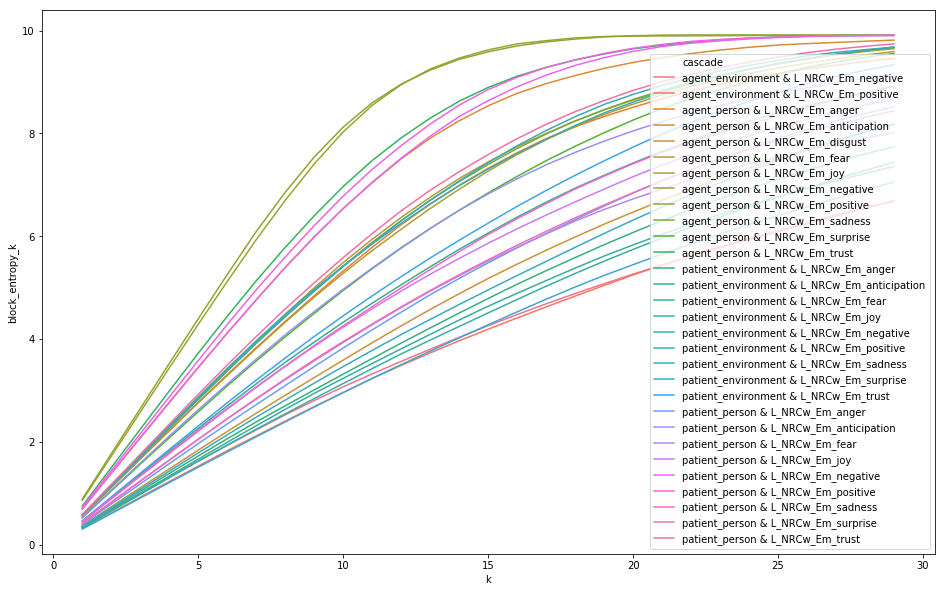

In [521]:
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k', hue='cascade')
plt.show()

In [541]:
block_entrs['block_entropy_k_diff'] = block_entrs.block_entropy_k.diff()
block_entrs[['e','f']] = block_entrs.cascade.str.split(' & ',expand=True)
block_entrs['block_entropy_k_ratio'] = block_entrs.block_entropy_k / block_entrs.k
block_entrs['block_entropy_k_ratio_diff'] = block_entrs['block_entropy_k_ratio'].diff()
#block_entrs['f'] = block_entrs.cascade.str.split(' & ')[1]

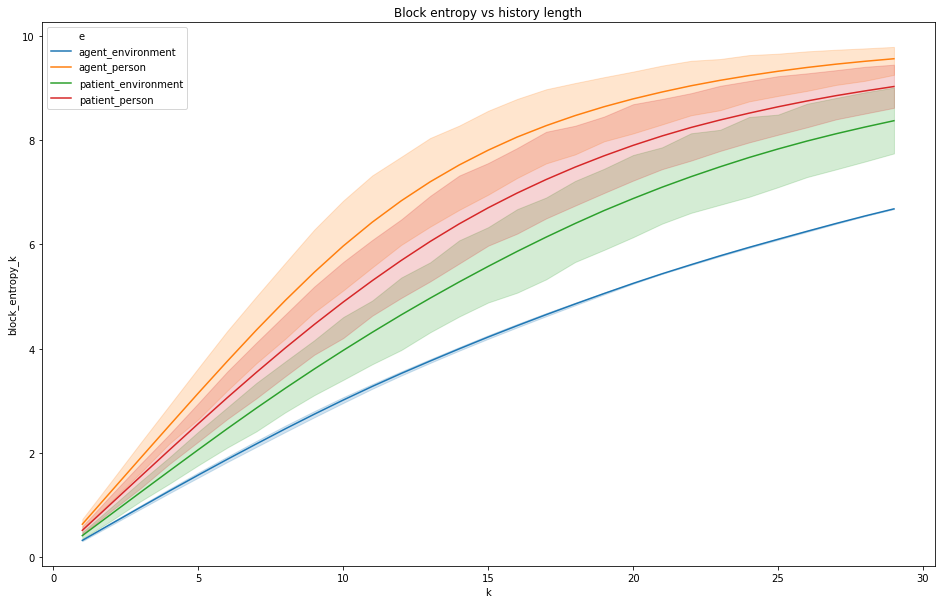

In [543]:
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k', hue='e')
plt.title('Block entropy vs history length')
plt.show()

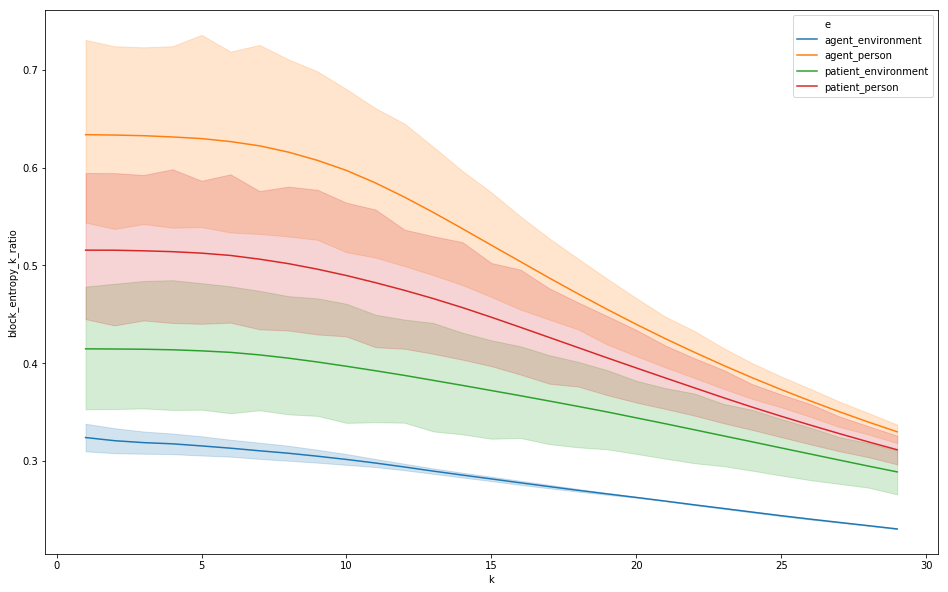

In [539]:
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k_ratio', hue='e')
plt.show()

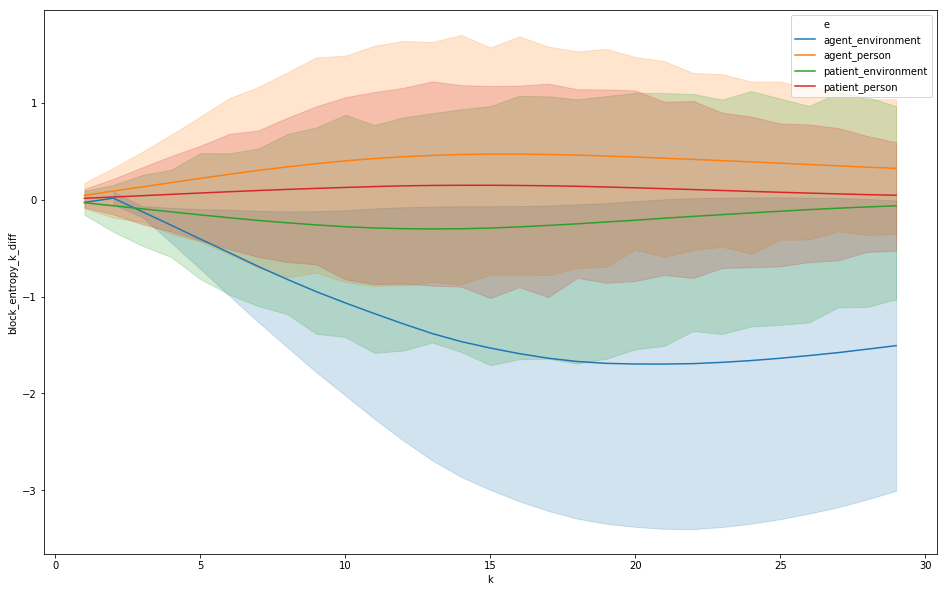

In [542]:
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k_diff', hue='e')
plt.show()

In [590]:
py.offline.plot_mpl?

In [591]:
spacy.util.minibatch?